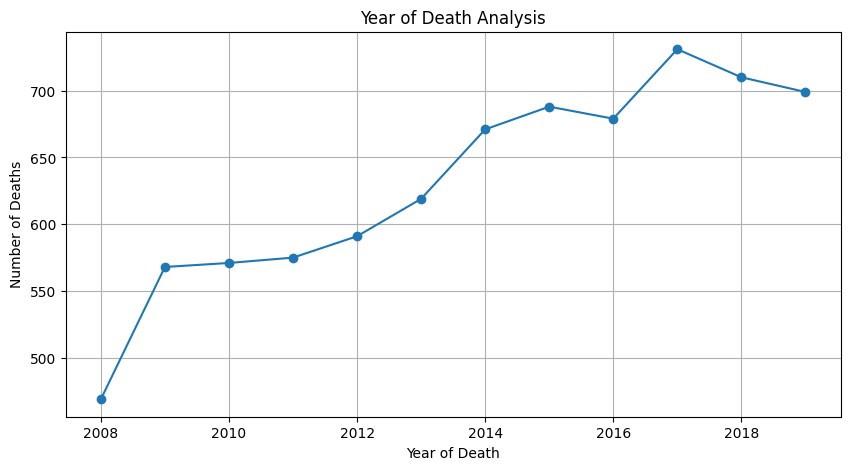

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '~/Documents/college/dgt-hum-140/jail-deaths.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year of Death')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths per Year')
plt.grid(True)
plt.show()

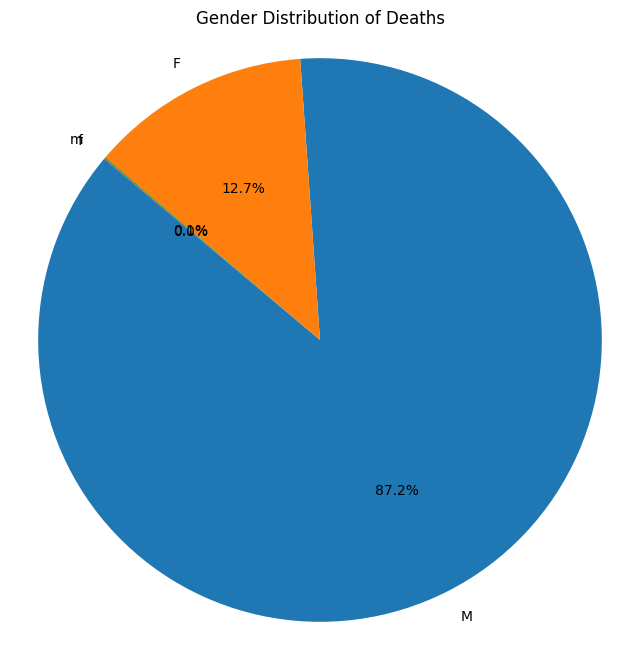

In [10]:
gender_counts = df['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Deaths')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

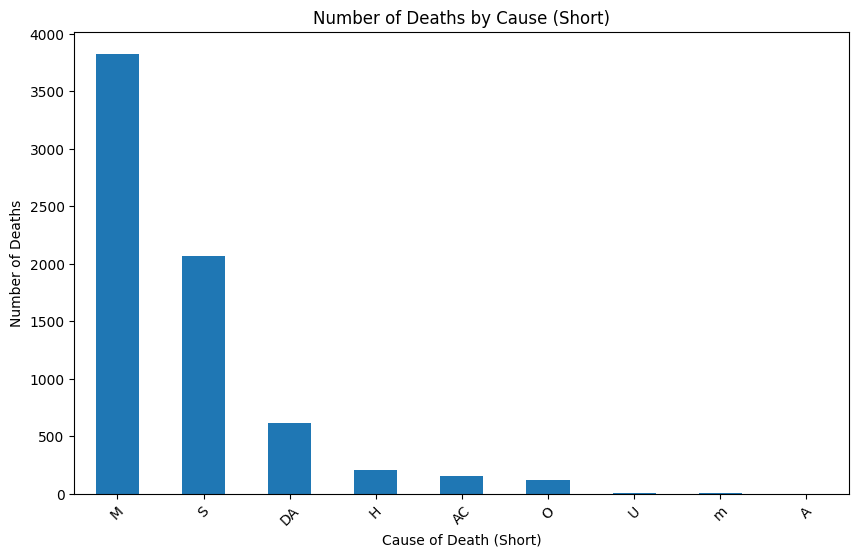

In [11]:
cause_counts = df['cause_short'].value_counts().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
cause_counts.plot(kind='bar')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Cause')
plt.xticks(rotation=45)
plt.show()

In [15]:
import plotly.express as px

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.scatter_geo(
    state_counts,
    locations='state',
    locationmode='USA-states',
    size='count',
    title='Count of Deaths per State',
    scope='usa',
    labels={'state': 'State', 'count': 'Count of Deaths'}
)

fig.update_layout(
    width=1200,
    height=800
)

fig.show()

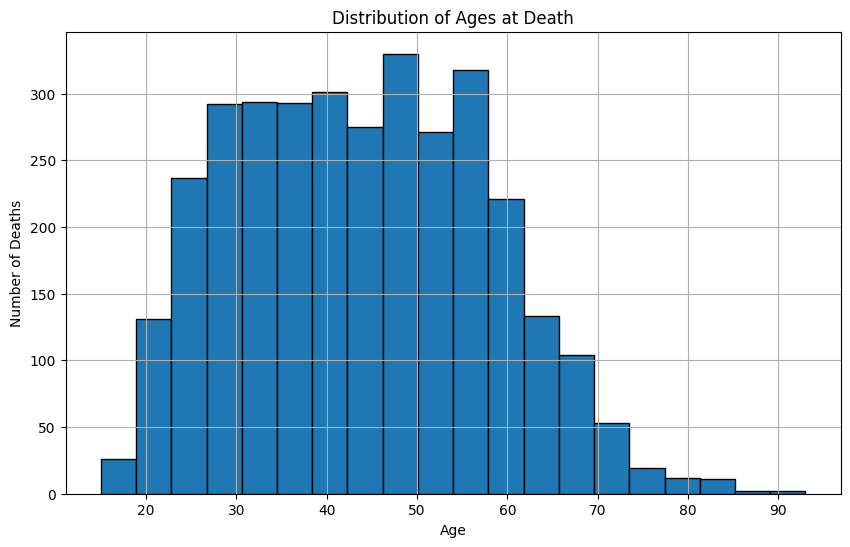

In [16]:
df = df.dropna(subset=['age'])

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Ages at Death')
plt.grid(True)
plt.show()